Lazanyi I. and Szirmay-Kalos L. Fresnel Term Approximation for Metals

$$
F(\eta,k,\cos \theta) = \frac{(\eta-1)^2 + 4\eta(1-\cos \theta)^5 + k^2}{(\eta+1)^2+k^2}
$$

$$
F(\eta,k,\cos \theta) = \frac{(\eta-1)^2 + 4\eta(1-\cos \theta)^5 + k^2}{(\eta+1)^2+k^2} - a \cos \theta(1- \cos \theta)^\alpha
$$
where
$$
a = \text{lerp}(2\eta, 0, \min(\cos\theta, 0.15))
$$

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

## Original Fresnel for non-polarized wave

In [2]:
def cofresnel(n=2.,k=4., theta=0.5):
    n2 = n*n
    k2 = k*k
    theta2 = theta*theta
    tmp1 = n2 - k2
    sintheta = theta2 - 1.
    tmp2 = (tmp1 + sintheta)**2
    nk4 = 4. * n2 * k2
    tmp2nk4 = tmp2 + nk4
    tmp3 = tmp2nk4 + tmp1 + sintheta
    a2 = np.sqrt(tmp3)/2.
    tmp4 = tmp2nk4 - n2 + k2 - theta2 + 1.
    b2 = np.sqrt(tmp4)/2.
    a= np.sqrt(a2)
    F1 = ((a - theta)**2 + b2) / ((a + theta)**2 + b2) / 2.
    u1 = 1. / theta
    F2 = ((a + theta - u1)**2 + b2)/((a - theta + u1)**2 + b2) + 1.
    return F1*F2

## Approximation

In [3]:
def lerp(a, b, bias):
    tmp = b - a
    add = tmp * bias
    return a + add

def cfresnel(n=2, k=4, theta=0.5):
    f = (n-1)**2 + 4*n*(1-theta)**5 + k*k
    f /= (n+1)**2 + k*k
    return f

def errocomp(n, theta, alpha = 7):
    bias = 0.15 - np.min(theta, 0.15)
    a = lerp(1, 2*n, bias)
    return a

#with error compensation
def cefresnel(n=2, k=4, theta=0.5, alpha = 3):
    val = cfresnel(n, k, theta)
    err = errocomp(n, theta, alpha)
    return val ** err

In [4]:
silvero = lambda x: cofresnel(1/0.15, 3.4727, x)
silvercomp = lambda x: cefresnel(1/0.15, 3.4727, x)

allum = lambda x: cfresnel(1/1.0972, 6.7943, x)
allumcomp = lambda x: cefresnel(1/1.0972, 6.7943, x)

/usr/lib64/python3.4/site-packages/numpy/core/_methods.py:29: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return umr_minimum(a, axis, None, out, keepdims)


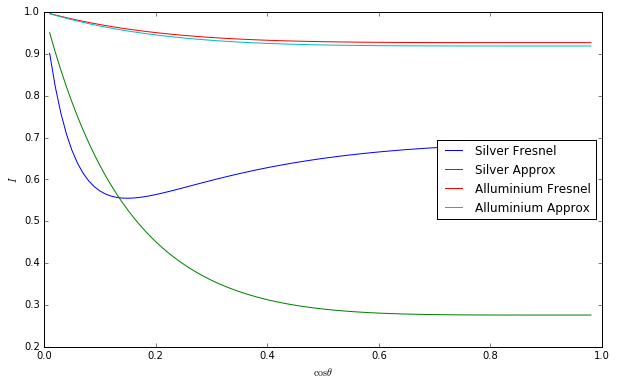

In [5]:
ms = np.arange(0.01, 0.99, 0.01)

data = [(silvero(ms), 'Silver Fresnel'),
        (silvercomp(ms), 'Silver Approx'),
        (allum(ms), 'Alluminium Fresnel'),
        (allumcomp(ms), 'Alluminium Approx')]

fig = plt.figure(figsize = (10,6))
ax = fig.add_subplot(111, xlabel='$\cos\\theta$', ylabel='$I$')

for y, lbl in data:
    pl = ax.plot(ms, y, label=lbl)

leg = ax.legend(loc=5)